In [6]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [7]:
q = QuantumRegister(13,'q')
c = ClassicalRegister(5,'c')
qc = QuantumCircuit(q,c)

#to add fourth question

#qc.x(q[0]) #uncomment to make a0=1
#qc.x(q[4]) #a1
#qc.x(q[7]) #a2
#qc.x(q[10]) #a3

qc.h(q[7])
qc.cx(q[7],q[4])
qc.cx(q[7],q[0])#entangling a


#qc.x(q[1]) #b0
#qc.x(q[5]) #b1
#qc.x(q[8]) #b2
#qc.x(q[11]) #b3

qc.h(q[11])
qc.cx(q[11],q[8])
qc.cx(q[11],q[5])
qc.cx(q[11],q[1])
qc.x(q[11])





#qc.x(q[2]) #cin=0



In [8]:
def full_adder(a,b,cin,cout):
    qc.ccx(a,b,cout)
    qc.ccx(b,cin,cout)
    qc.ccx(cin,a,cout)#finding carry
    qc.cx(a,b)
    qc.cx(b,cin)#finding sum
    

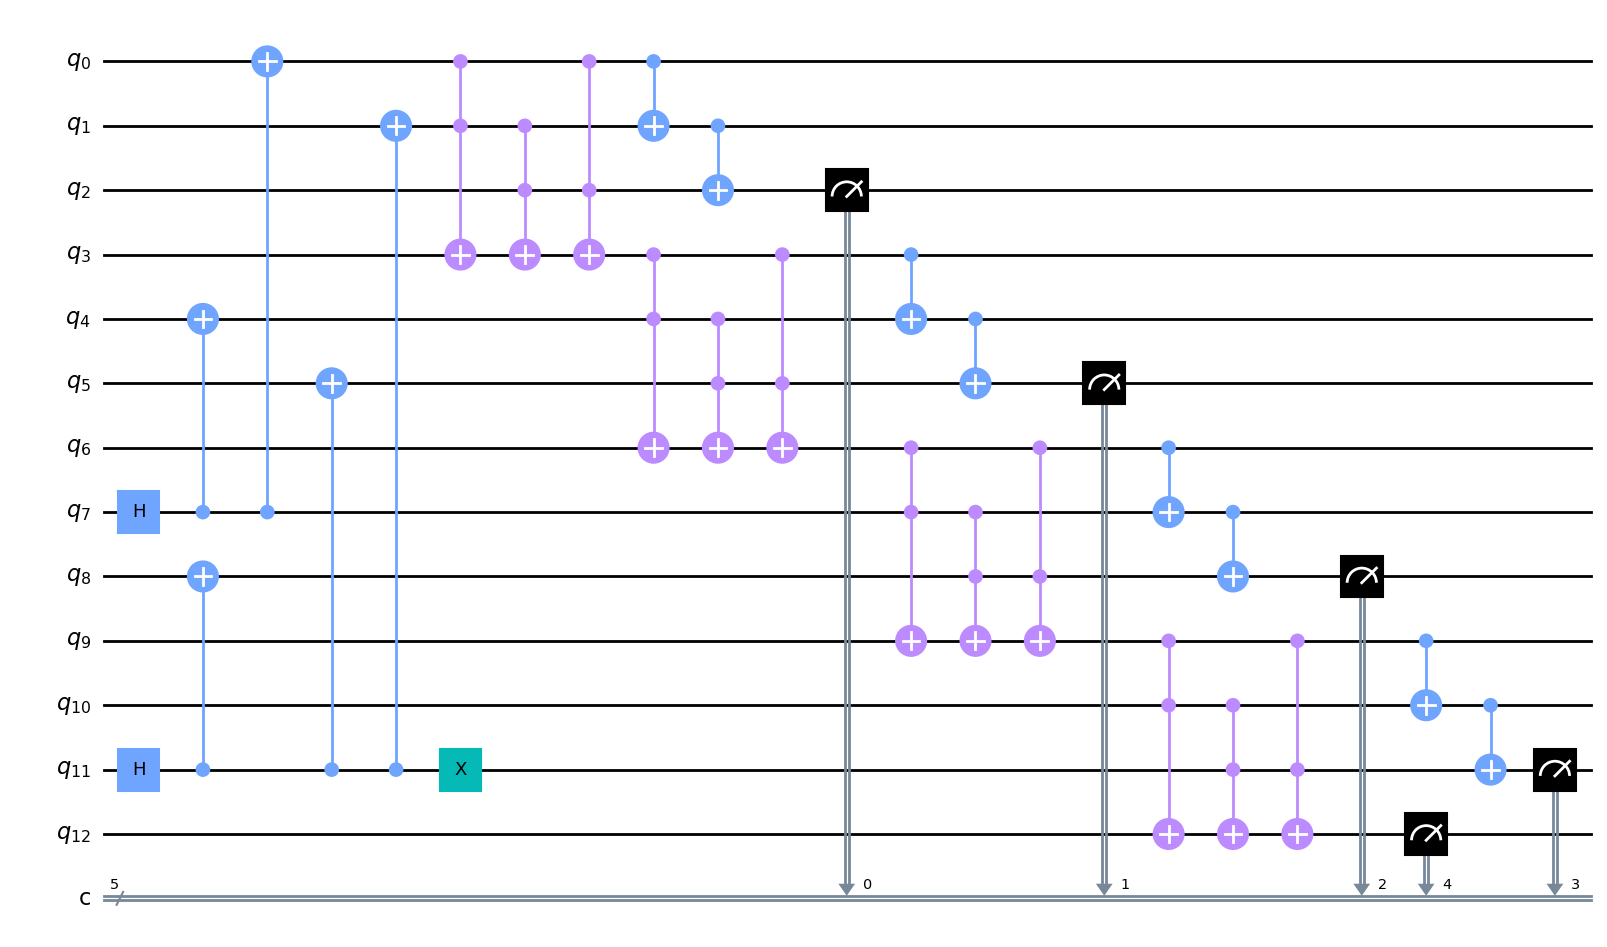

In [9]:
full_adder(q[0],q[1],q[2],q[3])
full_adder(q[3],q[4],q[5],q[6])
full_adder(q[6],q[7],q[8],q[9])
full_adder(q[9],q[10],q[11],q[12])

qc.measure(q[2],c[0])
qc.measure(q[5],c[1])
qc.measure(q[8],c[2])
qc.measure(q[11],c[3])
qc.measure(q[12],c[4])

qc.draw('mpl')

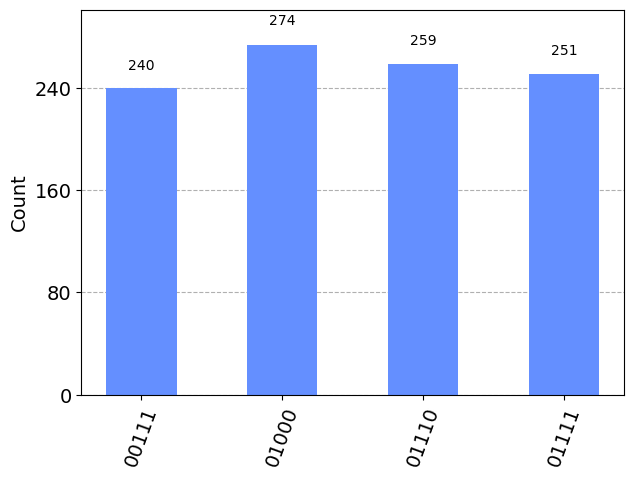

In [10]:
result = execute(qc,Aer.get_backend('qasm_simulator')).result()

plot_histogram(result.get_counts(qc))




In [13]:
result = result.get_counts()
print(result)


{'00111': 250, '01000': 254, '01111': 248, '01110': 272}
